# P3 拉勾网数据分析师岗位分析 #

## 项目背景 ##

    从去年7月份开始学习Udacity的课程，到现在也算学了不少内容，接下来打算慢慢开始找工作了。在这之前，要花点时间把自己学习的知识复习回顾一遍，也要做一些实战项目多多练习，以增加熟练度。本项目打算着重复习python数据分析相关的知识，主要包括numpy, pandas和matplotlib这几个库。
    
## 项目简介 ##
    
    既然想要从事数据分析师这个岗位，那自然首先需要对这个岗位有所了解。最直接、最真实的方式就是从企业那里获得需求讯息，这样才最能够指导自己的学习方向和简历准备。
    本次项目即是要利用爬虫爬取拉勾网上数据分析这一岗位的信息，然后进行一些探索和分析，以数据分析来了解‘数据分析’。
    
## 数据来源和数据集 ##
    
    本项目所使用的数据集全部来自拉勾网，是通过集搜客这一网络爬虫工具来爬取的。集搜客是一款简洁易用且功能强大的网络爬虫产品，通过鼠标点选和简单的命令操作即可实现爬虫的定制和运行，这里也推荐一下。
    之所以选择拉勾网作为本项目的数据源，主要是因为相对于其他招聘网站，拉钩网上的岗位信息非常完整、整洁，极少存在信息的缺漏。并且几乎所有展现出来的信息都是非常规范化的，极大的减少了前期数据清理和数据整理的工作量。（笔者毕竟是工作之余完成，时间有限，能省则省）
    本次爬取信息的时候，主要获得了以下信息：
| 内容    | 字段        |
|:---------- |:------     |
|岗位名称 |title       |
|月薪     |month_salary|
|公司名称  |company     |
|所属行业  |industry    |
|公司规模  |scale       |
|融资阶段  |phase       |
|投资人    |investors   |
|所在城市  |city        |
|经验要求  |experience  |
|学历要求  |qualification|
|全职/兼职 |full_or_parttime|
|职位描述及任职要求|description|

## 目的 ##

    主要是希望通过实际的数据来解答针对数据分析岗位的一些疑惑，Udacity数据分析师课程的童鞋一些参考性的意见。具体来说，主要针对以下几个问题：

1. 数据分析师岗位需求的地域性分布；
2. 整个群体中薪酬分布的情况；
3. 不同城市数据分析师的薪酬情况是怎样的；
4. 该岗位对于工作经验的要求是怎样的；
5. 根据工作经验的不同，薪酬是怎样变化的；
6. 从用人单位的角度看，数据分析师应当具备哪些技能？
7. 掌握不同技能是否会对薪酬有影响？影响是怎样的？

## 技术和工具 ##

    本项目主要分为两大部分，第一部分是数据爬取，采用的是集搜客网络爬虫工具。第二部分是数据分析，以python编程语言为基础。
    数据分析部分主要使用pandas作为数据整理和统计分析的工具，matplotlib用于图形的可视化，seaborn库包用于图形美化。在进行技能需求分析的时候，使用了jieba作为分词工具包，并使用wordcloud包制作词云。
    
        闲话不多说，下面切入正题。

## 数据整理 ##

### 加载和清理 ###

In [1]:
    # -*- coding:utf-8 -*-
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import jieba
    import jieba.analyse
    import random
    from wordcloud import WordCloud
    from matplotlib import pyplot as plt
    from matplotlib.font_manager import FontProperties
    #import seaborn as sns
    import pprint
    %matplotlib inline
    
    #由于matplotlib默认字体不是中文字体，在进行中文显示的时候只有一个框框，因此必须显式的指定字体文件
    import matplotlib as mpl
    font_small = mpl.font_manager.FontProperties(fname=
                    "/Users/carrey/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/Vera.ttc",
                    size = 12)
    font_big = mpl.font_manager.FontProperties(fname=
                    "/Users/carrey/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/Vera.ttc",
                    size = 24)

In [2]:
    data = pd.read_excel('Data_Lagou_utf8.xlsx')

    #清理不需要的字段
    new_data = data.drop([u'_clueid', u'_fullpath', u'_realpath', u'_theme',
                            u'_middle',u'_pageno', u'_actionno', u'_actionvalue'],
                            axis = 1)

    #清理重复行
    clean_data = new_data.drop_duplicates(['company','title','description'])
    print clean_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 588
Data columns (total 13 columns):
_createdate         575 non-null object
title               575 non-null object
month_salary        575 non-null object
company             574 non-null object
industry            574 non-null object
scale               574 non-null object
phase               574 non-null object
investors           115 non-null object
city                575 non-null object
experience          575 non-null object
qualification       575 non-null object
full_or_parttime    575 non-null object
description         575 non-null object
dtypes: object(13)
memory usage: 62.9+ KB
None


    可以看到，经过初步清理后，数据集中有效变量为13个，数据记录575条。除了投资人这一项之外，其他各字段的数据完整度非常好，几乎没有缺失值。这对于后面的分析来说是个大大的好消息。

## 数据分析 ##

### 地域性分布 ###

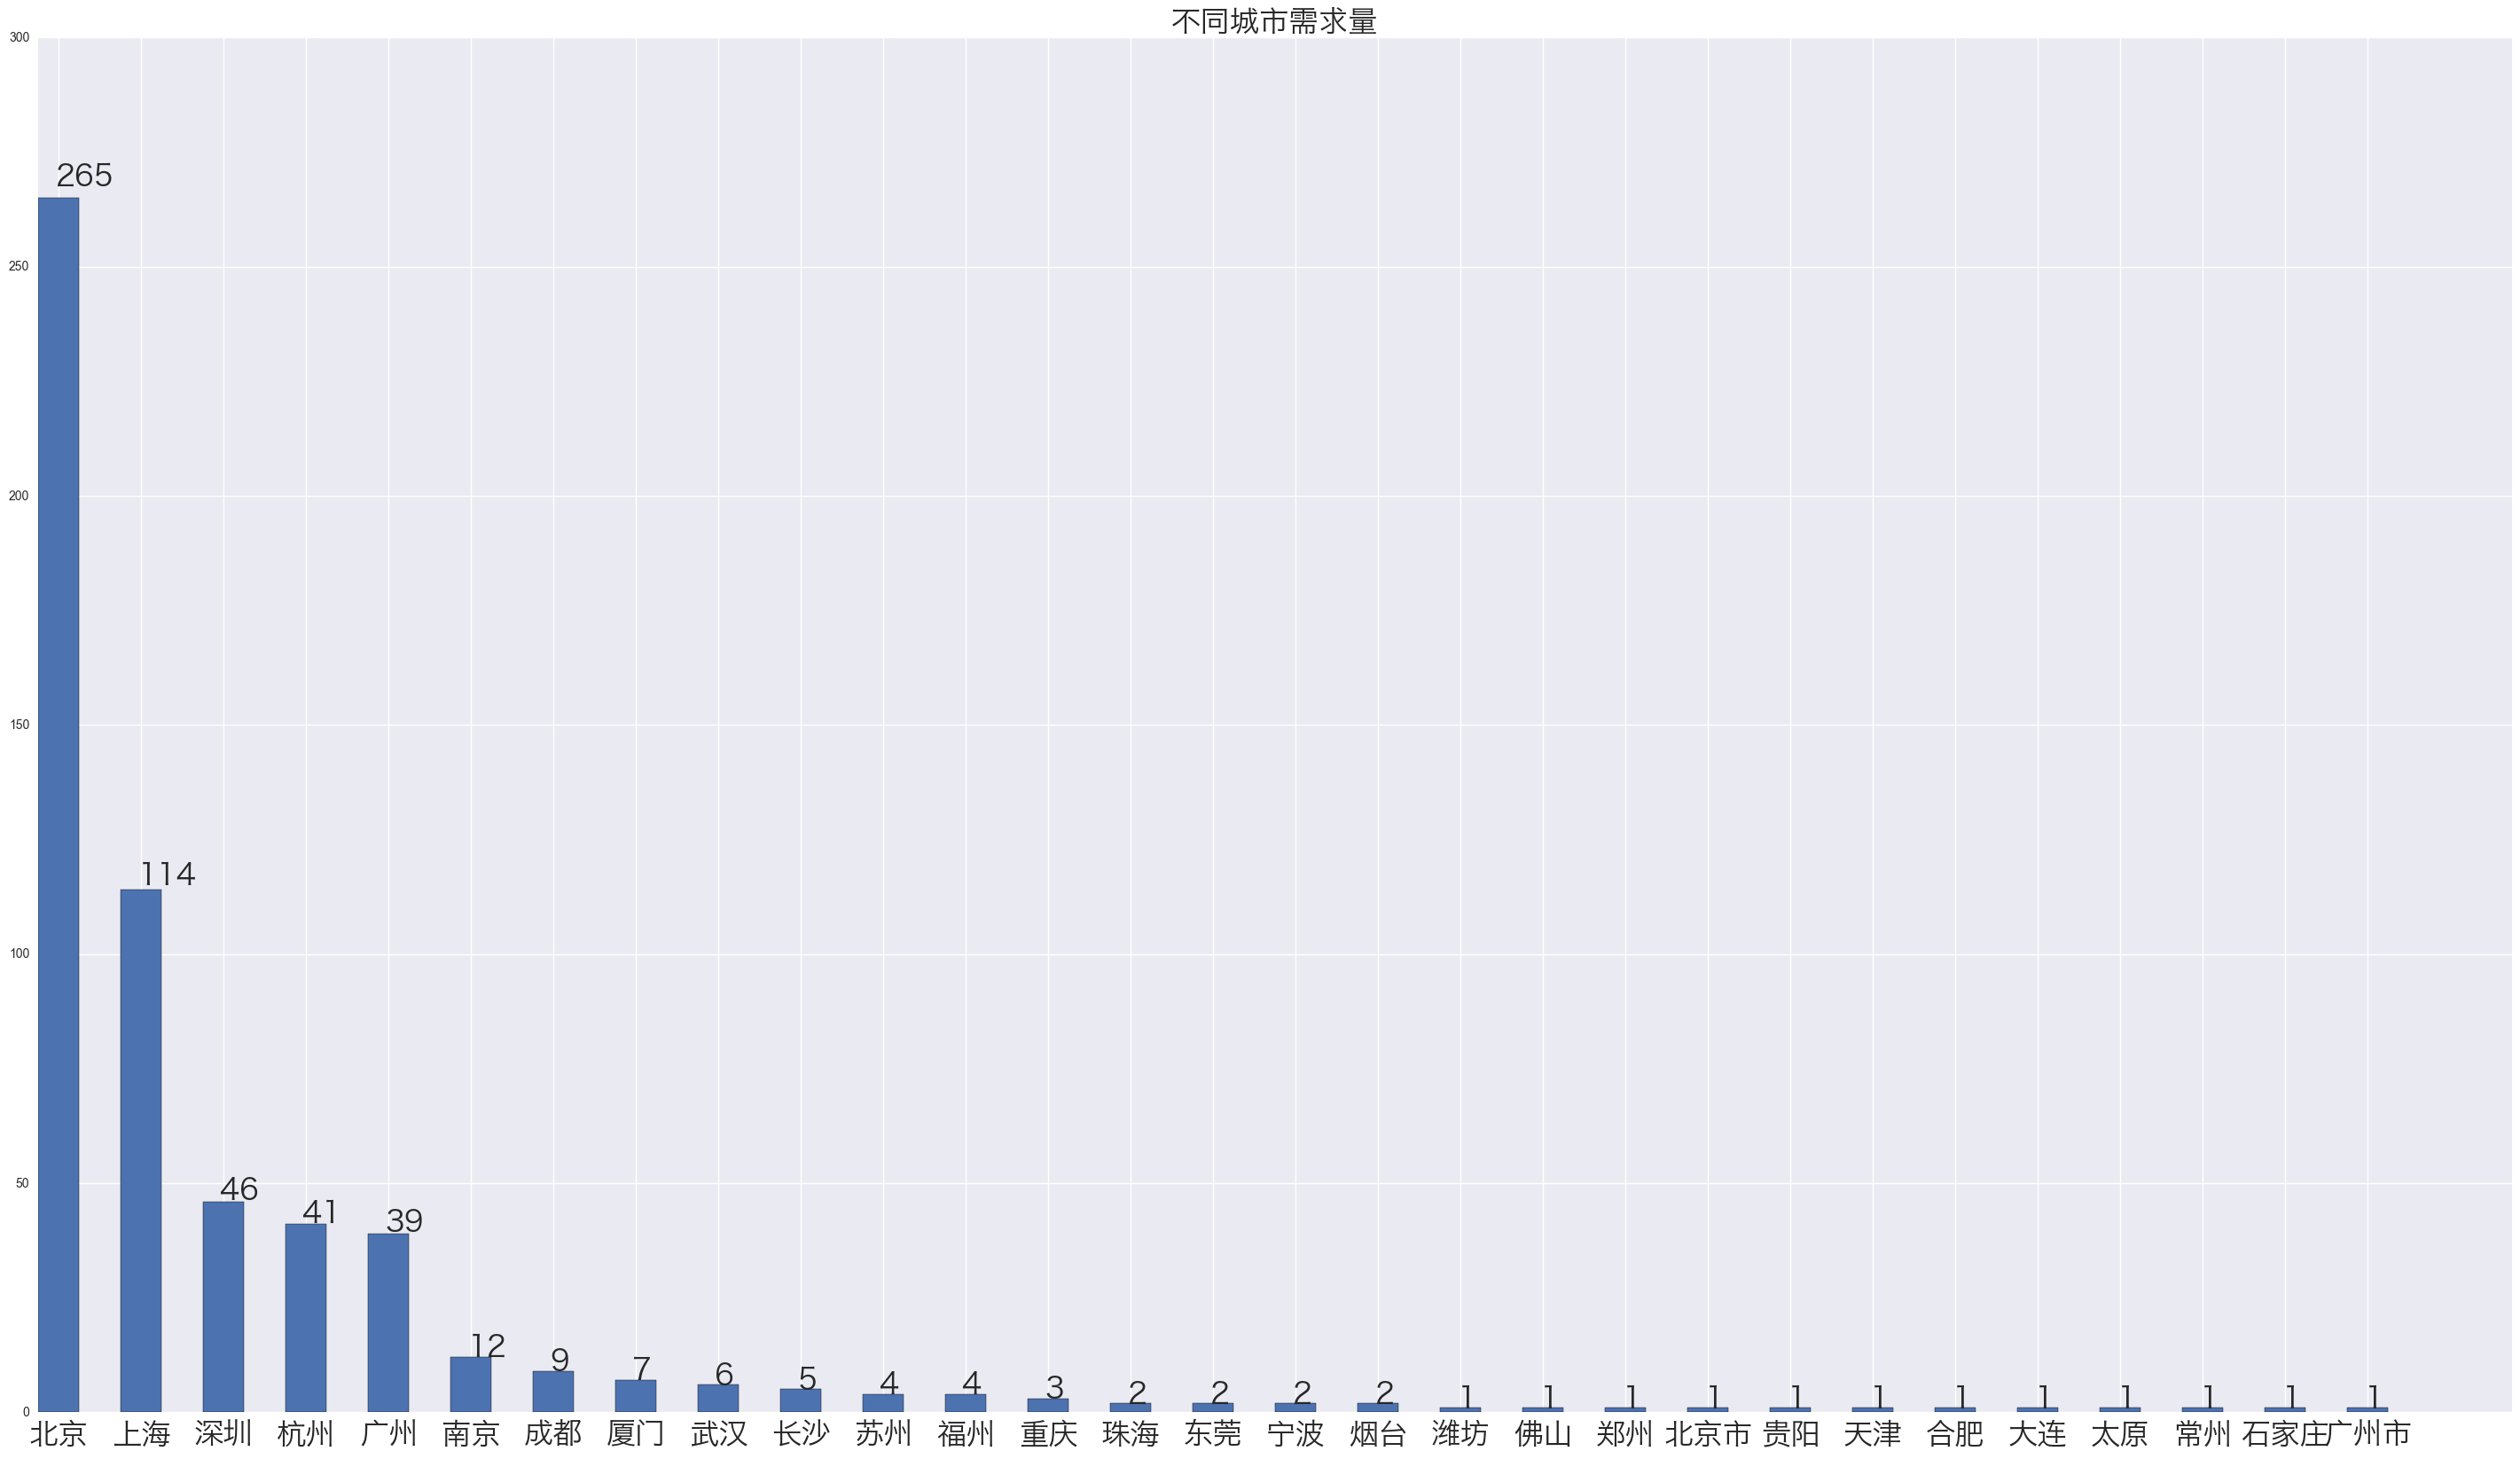

In [12]:
    #观察地域分布情况
    count_by_city = clean_data.groupby(['city'])['title'].count().sort_values(ascending = False)
    
    fig = plt.figure(figsize=(36,20))
    ax1 = plt.subplot(111)
    rect = ax1.bar(np.arange(len(count_by_city)),count_by_city.values, width = 0.5)

    #设置X轴刻度标签：
    def auto_xtricks(rects,xticks):
        x = []
        for rect in rects:
            x.append(rect.get_x() + rect.get_width()/2)
        x = tuple(x)
        plt.xticks(x,xticks)
    auto_xtricks(rect,count_by_city.index)
    ax1.set_xticklabels(count_by_city.index,fontproperties = font_big)
    
    #设置数据标签：
    def auto_tag(rects, data = None, offset = [0,0]):
        for rect in rects:
            try:
                height = rect.get_height()
                plt.text(rect.get_x()+rect.get_width()/2.4, 1.01*height, '%s' % int(height), fontproperties = font_big)
            except AttributeError:
                x = range(len(data))
                y = data.values
                for i in range(len(x)):
                    plt.text(x[i]+offset[0],y[i]+0.05+offset[1],y[i], fontproperties = font_big)
    auto_tag(rect,offset = [-1,0])
    ax1.set_title(u'不同城市需求量',fontproperties = font_big)


    在拉勾网上，全国有29个城市的企业邮数据分析师的人才需求，其中将近一半需求产生在北京市，需求量全国第一。排在前5的分别是：北京、上海、深圳、杭州、广州。

    数据分析这一职业大量集中在北上广深四大一线城市，以及杭州这个互联网和电子商务企业的聚集地。北京市巨大的需求比重令我稍感意外，不过，考虑到拉勾网是一个偏重互联网相关行业的招聘平台，而我国大量互联网企业在北京聚集，这个结果倒也算合理。以后有时间，可以对全国互联网行业分布特点做个分析。

总而言之，可以得出一个清晰的结论：**数据分析这一岗位，有大量的工作机会集中在北上广深以及杭州，**期待往这个方向发展的同学还是要到这些城市去多多尝试。当然，从另一个方面说，这些城市也都集中了大量的各行业人才，竞争压力想必也是很大的。

### 总体薪酬情况 ###

/Users/carrey/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


([<matplotlib.axis.XTick at 0x11ccaa290>,
 <a list of 19 Text xticklabel objects>)

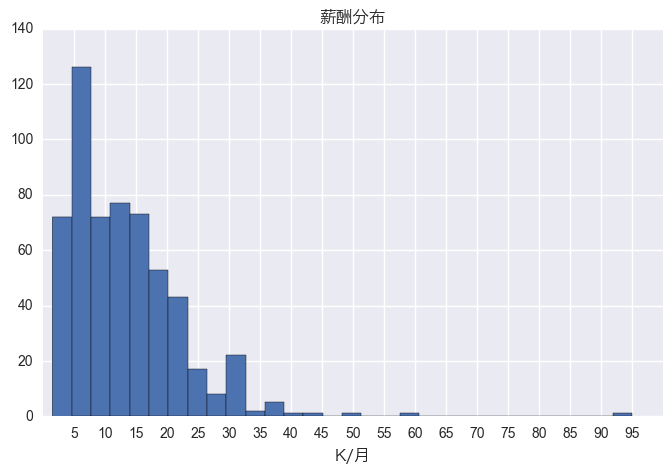

In [25]:
    #查看薪酬分布
    #由于拉勾网上的薪酬分布是个区间范围，并且多有重叠部分，不便于量化分析
    #因此将此数据进行清理，取区间的均值作为薪酬值
    def avg_salary(salary):
        #该函数传入一个薪酬区间字符串，并将其转换成区间均值并返回
        try:
            s_list = salary.split('-')
            s_min = int(s_list[0][:-1])
            s_max = int(s_list[1][:-1])
            s_avg = float(s_min + s_max)/2
        except UnicodeEncodeError:
            s_list = salary.split('k')
            s_avg = float(int(s_list[0][:-1]))
        return s_avg

    clean_data['avg_month_salary'] = clean_data['month_salary'].apply(avg_salary)

    fig = plt.figure(figsize =  (8,5))
    ax2 = plt.subplot(111)
    rect = ax2.hist(clean_data['avg_month_salary'], bins = 30)
    ax2.set_title(u'薪酬分布',fontproperties = font_small)
    ax2.set_xlabel(u'K/月', fontproperties = font_small)
    plt.xticks(range(5,100,5))
    
    

如同大多数其他工作一样,数据分析师的薪酬也是一个右偏分布。大多数人的收入集中在5k-20k每月，只有少数人能够获得更高的薪酬，但有极少数人薪酬极高，让人充满期待。需要说明的是，**拉勾网上的薪酬值是一个区间值，并且相互之间互有重叠，为了便于分析，我取区间的中值作为代表值进行的分析。**因此，实际的薪酬分布情况可能会比图中的情况更好一些。总是有人能够拿到薪酬的上限。
    
    综合来看，数据分析师的薪酬收入整体还是可观的，从这方面说，选择这个职业还是不错的。

### 不同城市薪酬分布情况 ###

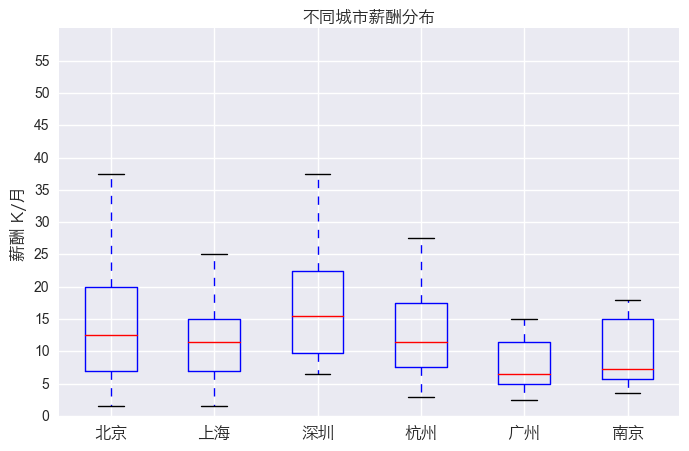

In [22]:
    #观察分城市的薪酬分布箱线图
    count_by_city_salary = clean_data.groupby(['city'])['avg_month_salary']
    
    #取前6个城市的数据
    small_data_by_city = count_by_city[0:6]
    
    #很多城市的数据样本太小，其箱线图并无实际意义，着重关注岗位数量前六位的城市
    df = []
    for group in small_data_by_city.index:
        v = count_by_city_salary.get_group(group).values
        df.append(v)
        
    fig = plt.figure(figsize = (8,5))
    ax3 = plt.subplot(111)
    rect = ax3.boxplot(df)
    
    #设置标签
    ax3.set_xticklabels(small_data_by_city.index, fontproperties = font_small)
    plt.yticks(range(0,60,5))
    
    ax3.set_title(u'不同城市薪酬分布',fontproperties = font_small)
    ax3.set_ylabel(u'薪酬 K/月',fontproperties = font_small)

忽略掉那些人才需求量比较小的城市，我重点关注排名前六的城市。从图上看，这六大城市的薪酬分布情况总体来说都比较集中，这和我们前面看到的全国的薪酬总体情况分布是一致的。深圳市薪酬分布中位数大约在15k,居全国首位。其次是北京，约12.5k，之后是上海和杭州。

深圳确实是个创造奇迹的城市，在这里也给了我一个小小的惊喜。**从待遇上看，数据分析师留在深圳发展是个不错的选择。**

### 工作经验需求 ###

/Users/carrey/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/carrey/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/carrey/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/carrey/anaconda/

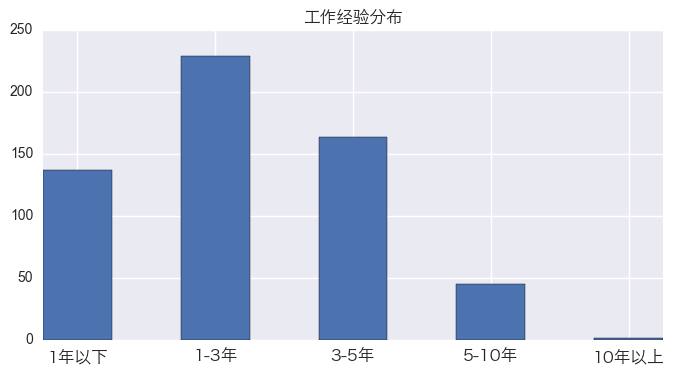

In [16]:
    #观察工作经验分布

    #处理工作经验这一列，干掉‘经验’二字
    def remove_first_2_word(word):
        return word[2:]

    clean_data['experience'] = clean_data['experience'].apply(remove_first_2_word)

    #根据实际经验，‘经验不限’和‘应届毕业生’这两个描述，基本等同于工作经验要求1年以下
    #把这几个合并
    for i in range(len(clean_data['experience'])):
        if clean_data['experience'].iloc[i] in [u'不限',u'应届毕业生']:
            clean_data['experience'].iloc[i] = u'1年以下'

    count_by_experience = clean_data.groupby(['experience'])['title'].count()

    #分组后，经验这一列数值变成了index,为了后续排序方便，另建一个数据框将其转为values
    value_by_exp = pd.DataFrame([count_by_experience.index,count_by_experience.values]).T
    value_by_exp.columns = ['exp','count']
    sort_by_exp = value_by_exp.copy()

    #按照经验需求排序
    mappings = {u'1年以下':1 ,u'1-3年':2 ,u'3-5年':3 ,u'5-10年':4 ,u'10年以上':5}
    sort_by_exp['sortby'] = sort_by_exp['exp'].map(mappings)
    sort_by_exp.sort('sortby', inplace = True)

    #绘制条形图
    fig = plt.figure(figsize = (8,4))
    ax4 = plt.subplot(111)
    rect = ax4.bar(np.arange(len(sort_by_exp)), sort_by_exp['count'], width = 0.5)

    auto_xtricks(rect,sort_by_exp.index)
    ax4.set_xticklabels(sort_by_exp['exp'], fontproperties = font_small)
    ax4.set_title(u'工作经验分布',fontproperties = font_small)


不出所料的，工作经验的需求分布近似于正态分布。工作1-3年经验的熟手需求量最大，其次是3-5年工作经验的资深分析师。工作经验不足1年的新人，市场需求量比较少。另外，工作经验要5-10年的需求量非常稀少，而10年以上的更是凤毛麟角。

从这个分布我们大致可以猜测出：
1. **数据分析是个年轻的职业方向，大量的工作经验需求集中在1-3年；**
2. **对于数据分析师来说，5年是个瓶颈期，如果在5年之内没有转型或者质的提升，大概以后的竞争压力会比较大。**

### 不同工作经验的薪酬分布###

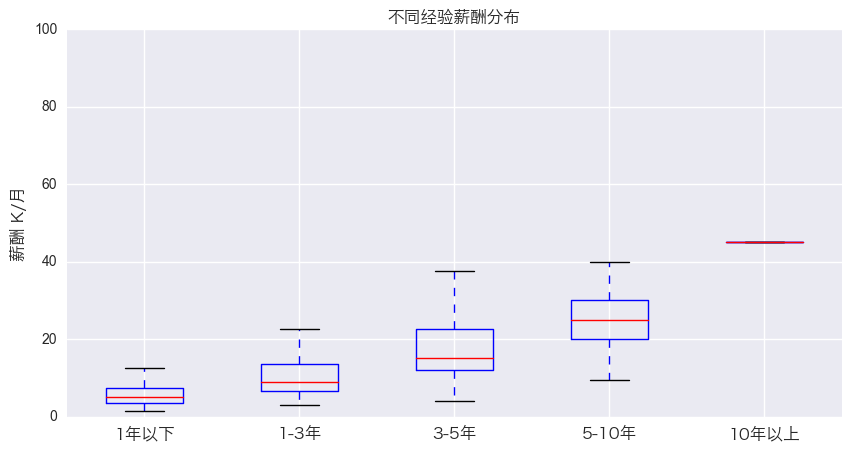

In [21]:
    #观察不同经验要求的薪酬分布
    group_by_exp = clean_data.groupby(['experience'])['avg_month_salary']
    
    df = []
    for group in sort_by_exp['exp']:
        v = group_by_exp.get_group(group).values
        df.append(v)
    
    fig = plt.figure(figsize = (10,5))
    ax5 = plt.subplot(111)
    rect = ax5.boxplot(df)
    
    ax5.set_xticklabels(sort_by_exp['exp'], fontproperties = font_small)
    ax5.set_title(u'不同经验薪酬分布',fontproperties = font_small)
    ax5.set_ylabel(u'薪酬 K/月',fontproperties = font_small)

毫无疑问的，随着经验的提升，数据分析师的薪酬也在不断提高。另外，**从现有数据来看，数据分析师似乎是个常青的职业方向，在10年内大概不会因为年龄的增长导致收入下降。**

### 职业技能关键词 ###

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/p7/6s6n_sw53dq_w9j52wlzyl800000gn/T/jieba.cache
Loading model cost 0.417 seconds.
Prefix dict has been built succesfully.
/Users/carrey/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


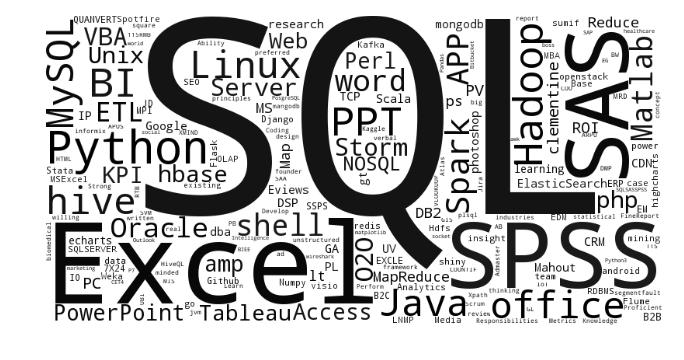

In [19]:
    #接下来是重头戏，处理description字段
    #首先抽取关键词
    def key_words(text):
        key_words = jieba.analyse.extract_tags(text, topK=20, withWeight=False, allowPOS=())
        return key_words
    
    clean_data['key_words'] = clean_data['description'].apply(key_words)
    
    #启用自定义字典
    jieba.load_userdict('userdict.txt')
    jieba.suggest_freq('office', False)
    
    #创建一个文本，将关键词列表全部写入该文本
    def write_to_text(word_list):
        f = open('word_list_text.txt','a')
        for word in word_list:
            f.writelines((word+u',').encode('utf-8'))
        f.close()
    
    clean_data['key_words'].apply(write_to_text)
    
    text = open('word_list_text.txt','r').read()
    
    ##python对中文编码的支持实在太坑爹，必须把utf-8转化为Unicode中间值才能正常显示词云
    ##如不进行转换，则只处理英文部分，中文部分会被忽略
    #text = unicode(text,encoding='utf-8')
    
    #通过wordcloud提供的接口，读入文本文件后自动根据词频绘制词云
    wcd = WordCloud(width = 800, height = 400,background_color = 'white').generate(text)
    
    #自定义词云字体颜色，本例是黑色
    def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        return "hsl(0, 0%%, %d%%)" % random.randint(0, 10)
    
    fig = plt.figure(figsize=(8,4))
    plt.imshow(wcd.recolor(color_func=grey_color_func, random_state=3))
    plt.axis("off")
    plt.show()
    
    #可以使用jieba.analyse工具提取关键词，这样除了英文字符串之外，还可以
    #print jieba.analyse.extract_tags(clean_data['description'][2], topK=20, withWeight=False, allowPOS=())
    

词云显示出的情况，有点超出了我的预料。对于数据分析师这一岗位，企业需求频率最高的技能并不是Python语言和R语言等如今非常时髦的数据分析语言，而是传统的结构化查询语言SQL和表格神器Excel。这一点需要各位小伙伴注意，**要想从事数据分析师岗位，SQL和Excel看起来是必备技能。**

从词云上看出，数据分析师技能需求频率排在前列的有：**SQL，Excel, SAS，SPSS, Python, Hadoop和MySQL等。**另外，Java, PPT, BI软件等属于第二梯队。

### 掌握不同技能对薪酬收入的影响##

/Users/carrey/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


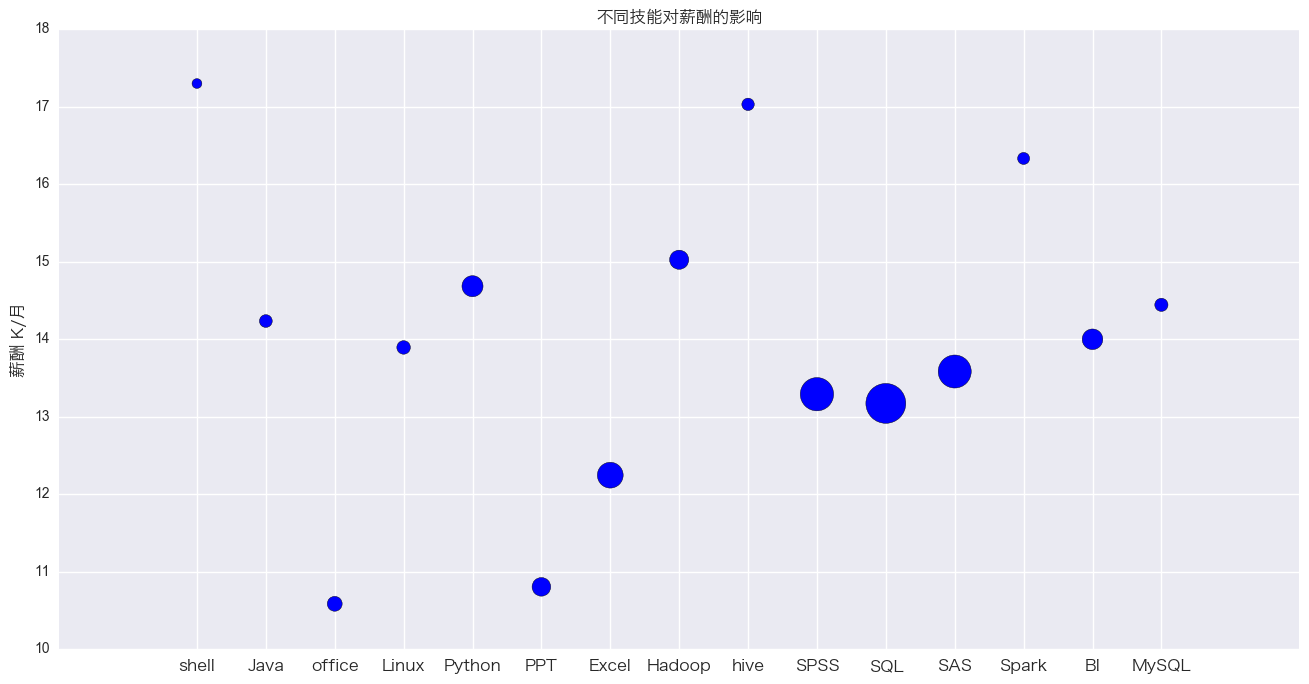

In [20]:
    #针对出现频率最高的前几个技能，统计平均薪酬
    def avg_salary_by_tech(x, tech):
        avg_salary_by_tech = {}
        count_by_tech = {}
        
        for t in tech:
            temp = []
            for i in range(len(x['key_words'])):
                if t[0] in x['key_words'].iloc[i]:
                    temp.append('1')
                else:
                    temp.append('0')
            x['count_by'] = pd.DataFrame(temp)
            
            grouped = x.groupby(['count_by'])['avg_month_salary']
            avg_salary_by_tech[t[0]] = grouped.get_group('1').mean()
            count_by_tech[t[0]] = grouped.get_group('1').count()
            #del x['count_by']
            
        #avgs_by_t = sorted(avg_salary_by_tech.items(), key = lambda x:x[1], reverse = True)
        #count_by_t = sorted(count_by_tech.items(), key = lambda x:x[1], reverse = True)
        avgs_by_t = avg_salary_by_tech.items()
        count_by_t = count_by_tech.items()
        return avgs_by_t,count_by_t
    

    tech_tuples = wcd.words_

    avgs_by_t,count_by_t = avg_salary_by_tech(clean_data, tech_tuples[:15])
    
    df_avgs_t = pd.DataFrame(avgs_by_t,columns = ['Tech','Avgs'])
    df_count_t = pd.DataFrame(count_by_t, columns = ['Tech','Count'])
    
    df_merge_t = pd.merge(df_avgs_t, df_count_t, on = 'Tech')
    #print df_merge_t.head()

    fig = plt.figure(figsize = (16,8))
    ax6 = plt.subplot(111)
    rect = ax6.scatter(x = range(len(df_merge_t)), y = df_merge_t['Avgs'], s = df_merge_t['Count']*5)
    plt.xticks(df_merge_t.index)
    ax6.set_xticklabels(df_merge_t['Tech'], fontproperties = font_small)
    ax6.set_title(u'不同技能对薪酬的影响',fontproperties = font_small)
    ax6.set_ylabel(u'薪酬 K/月',fontproperties = font_small)
    
    #plt.show()


我对需求频率最高的前15个技能进行统计计算，得出每一个技能对应的平均薪酬水平，如上图。点的大小代表该技能需求量的多少。

在前15项技能中，shell，Hive， Spark这三者的平均薪酬水平最高，并且相对其他技能来说有比较大的差异。对数据分析师工作有所了解的人应该都知道，这三个工具中，Hive和Spark都是应用于分布式数据处理，而shell脚本则是Linux系统下工作的必须技能。这三者共同指向了一个方向，那就是海量数据的分布式处理！

所以，想要拿高薪的小伙伴注意了，**海量数据处理、分布式处理框架**是走向高薪的正确方向。

另外值得注意的是，**在数据分析领域，Python语言的平均薪酬水平要高于目前如日中天的Java语言。而SQL语言和传统的SAS，SPSS两大数据分析软件，则能够让你在保证中等收入的条件下，能够适应更多企业的要求，也就意味着更多的工作机会。**

## 分析结论 ##

通过上面的分析，我们可以得到的结论有这些：
1. 数据分析这一岗位，有大量的工作机会集中在北上广深以及杭州。
2. 大多数据分析师的收入集中在5k-20k每月，只有少数人能够获得更高的薪酬，但有极少数人薪酬极高，让人充满期待。
3. 从待遇上看，数据分析师留在深圳发展是个不错的选择，其次是北京、上海。
4. 数据分析是个年轻的职业方向，大量的工作经验需求集中在1-3年。
5. 对于数据分析师来说，5年似乎是个瓶颈期，如果在5年之内没有转型或者质的提升，大概以后的竞争压力会比较大。
6. 随着经验的提升，数据分析师的薪酬也在不断提高，10年以上工作经验的人，能获得相当丰厚的薪酬。
7. 数据分析师需求频率排在前列的技能有：SQL，Excel, SAS，SPSS, Python, Hadoop和MySQL等，其中SQL和Excel简直可以说是必备技能。 
8. 海量数据、分布式处理框架是走向高薪的正确方向。
9. SQL语言和传统的SAS，SPSS两大数据分析软件，能够让你在保证中等收入的条件下，能够适应更多企业的要求，也就意味着更多的工作机会。

## 思考和总结 ##

    对于数据分析师技能的分析是比较简陋的，在本次分析过程中，仅针对工具型的技能进行了分析。但其实，数据分析师所需要具备的素质远不止这些，还需要有扎实的数学、统计学基础，良好的数据敏感度，开拓但严谨的思维等。如果要对这些内容进行深入挖掘的话，应该会更加有趣。不过，要进行这项内容的话，需要掌握大量中文分词、关键字提取等方面的知识和技能，难度也会更高。时间所限，在这里不再进一步展开了，希望以后有时间再做一个专项分析吧。
    让人忍不住吐槽的是，Python2.X环境对中文编码的支持着实不够好，在处理数据的时候消耗了大量的时间和精力，也犯了不少错，走了很多弯路。以后这一块的内容要找时间专门攻坚一下，也可以考虑换到python3平台去。

## 特别说明##

    本次数据源完全来自拉勾网，但拉钩网本身是专注于互联网相关行业的招聘平台，所以本次分析出的结论更加适用于互联网行业的相关企业，对于其他行业的企业，未必合适。
    
## 作者##
    BigCarrey, Udacity DAND学员。
    
**文章可以转载，但必须注明作者和出处。**